# Técnica de agrupamiento (Clustering) K-Means | Iris Plant

Como primera instancia tomaremos la base de datos Iris plant como un conjunto de control, del cual conocemos las clases y los resultados que arroja esta base de datos.

In [1]:
#sección de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
#librerias especializadas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
sc= StandardScaler()
iris = pd.read_csv('../datasets/iris_plant/iris_plant.csv')
data = iris.columns.values.tolist()[:-1]
target = iris.columns.values.tolist()[-1]
X,y = iris[data],iris[target]
X_std = pd.DataFrame(sc.fit_transform(X),columns=[data]) #caracteristicas estandarizadas

In [3]:
X_train_std,X_test_std,y_train,y_test = train_test_split(X_std,y,test_size=0.20,random_state=0)

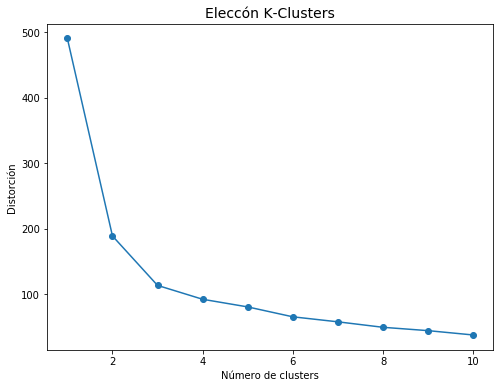

In [4]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X_train_std)
    distortions.append(km.inertia_)
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(111)
ax.set_title('Eleccón K-Clusters', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorción')
plt.show()

In [5]:
#implementando kmeans
kmean = KMeans(n_clusters=3,init='k-means++',random_state=0)
kmean.fit(X_train_std)
y_predict = kmean.predict(X_std)

In [6]:
iris_kmeans_std = X_std.copy()
iris_kmeans_std["cluster"] = pd.DataFrame(y_predict)
#ds caracteristicas originales
iris_kmeans = X.copy()
iris_kmeans["cluster"] = pd.DataFrame(y_predict)
iris_kmeans_std['cluster'] = iris_kmeans_std['cluster'].replace([0],3) #reemplazar el 0 por 3
iris_kmeans['cluster'] = iris_kmeans['cluster'].replace([0],3) #reemplazar 0 por 3

In [18]:
#guardando base de datos
iris_kmeans_std.to_csv('../datasets/Cluster_Datasets/IP_Kmeans_std_nuevo.csv',index=False)
iris_kmeans.to_csv('../datasets/Cluster_Datasets/IP_Kmeans_nuevo.csv',index=False)

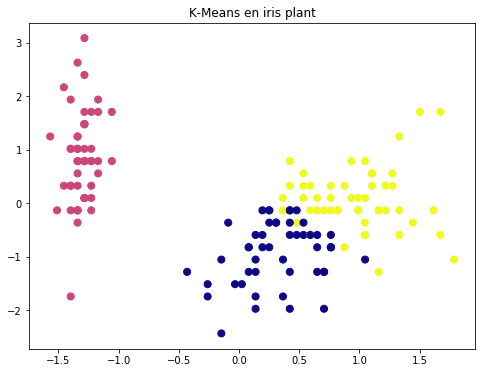

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_title('K-Means | Iris Plant', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.scatter(y=iris_kmeans_std['sepal.width'],x=iris_kmeans_std['petal.length'],
            c=iris_kmeans_std['cluster'],s=50,cmap='plasma')
plt.title('K-Means en iris plant')
plt.show()

# Técnica de agrupamiento (Clustering) K-Means | CMC

Como primera instancia tomaremos la base de datos CMC como un conjunto de control, del cual conocemos las clases y los resultados que arroja esta base de datos.

In [8]:
sc= StandardScaler()
cmc = pd.read_csv('../datasets/Contraceptive Method Choice/contraceptive_method_weka_dataset.csv')
data = cmc.columns.values.tolist()[:-1]
target = cmc.columns.values.tolist()[-1]
X,y = cmc[data],cmc[target]
X_std = pd.DataFrame(sc.fit_transform(X),columns=[data])

In [9]:
X_train_std,X_test_std,y_train,y_test = train_test_split(X_std,y,test_size=0.20,random_state=0)

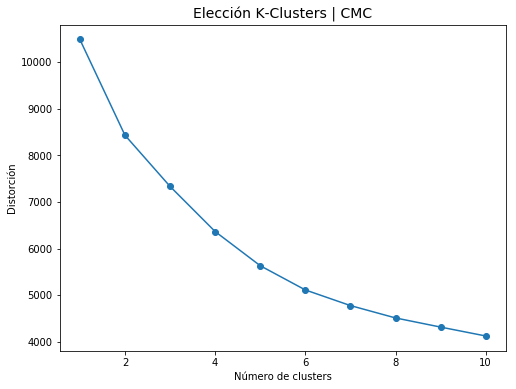

In [10]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X_train_std)
    distortions.append(km.inertia_)
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(111)
ax.set_title('Elección K-Clusters | CMC', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorción')
plt.show()

In [12]:
#implementando kmeans
kmean = KMeans(n_clusters=3,init='k-means++',random_state=0)
kmean.fit(X_train_std)
y_predict = kmean.predict(X_std)

In [13]:
cmc_kmeans_std = X_std.copy()
cmc_kmeans_std["cluster"] = pd.DataFrame(y_predict)
#ds caracteristicas originales
cmc_kmeans = X.copy()
cmc_kmeans["cluster"] = pd.DataFrame(y_predict)

In [14]:
cmc_kmeans_std['cluster'] = cmc_kmeans_std['cluster'].replace([0],3) #reemplazar el 0 por 3
cmc_kmeans['cluster'] = cmc_kmeans['cluster'].replace([0],3) #reemplazar 0 por 3

In [47]:
#guardando base de datos
cmc_kmeans_std.to_csv('../datasets/Cluster_Datasets/CMC_Kmeans_std_nuevo.csv',index=False)
cmc_kmeans.to_csv('../datasets/Cluster_Datasets/CMC_Kmeans_nuevo.csv',index=False)

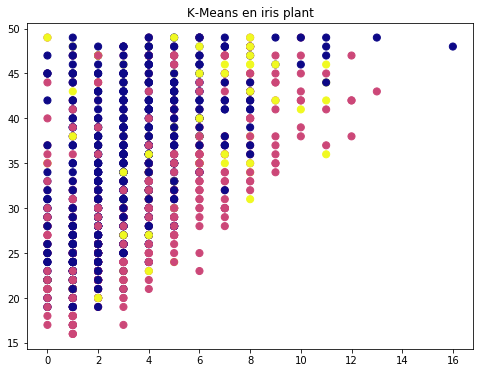

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.set_title('K-Means | CMC', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.scatter(x=cmc_kmeans['children'],y=cmc_kmeans['wife_age'],
            c=cmc_kmeans['cluster'],s=50,cmap='plasma')
plt.title('K-Means en iris plant')
plt.show()

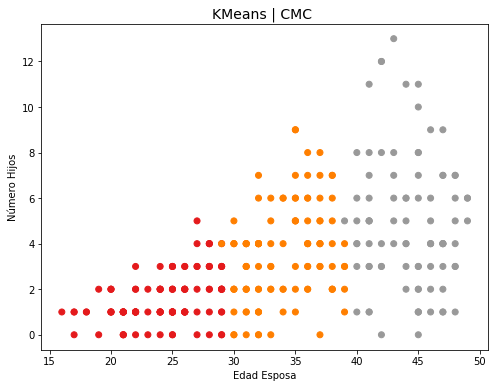

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X_train)
y_predict = kmeans.predict(X_test)
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(111)
ax.set_title('KMeans | CMC ', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.scatter(x=X_test['wife_age'],y=X_test['children'],c=y_predict,cmap='Set1')
plt.xlabel('Edad Esposa')
plt.ylabel('Número Hijos')
plt.show()